In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [2]:
df = pd.read_csv(r"C:\Users\ROOPSHREE\Downloads\temperature.csv")

In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.shape

(7752, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [7]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [8]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [9]:
df['station'].iloc[7750] = 1.0
df['station'].iloc[7751] = 2.0


C:\Users\ROOPSHREE\AppData\Local\Temp\ipykernel_55700\1485300820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['station'].iloc[7750] = 1.0
C:\Users\ROOPSHREE\AppData\Local\Temp\ipykernel_55700\1485300820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['station'].iloc[7751] = 2.0


In [10]:
df['Date'].iloc[7750] = '31-08-2017'
df['Date'].iloc[7751] = '31-08-2017'

C:\Users\ROOPSHREE\AppData\Local\Temp\ipykernel_55700\3866608906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'].iloc[7750] = '31-08-2017'
C:\Users\ROOPSHREE\AppData\Local\Temp\ipykernel_55700\3866608906.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'].iloc[7751] = '31-08-2017'


In [11]:
df.drop(columns =['lat','lon'],inplace=True)

In [12]:
for col in df.columns:
    if col not in ['station','Date']:
        df[col] = df[col].replace(np.nan, df[col].median())

In [13]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\ROOPSHREE\AppData\Local\Temp\ipykernel_55700\2394721818.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


C:\Users\ROOPSHREE\AppData\Local\Temp\ipykernel_55700\1323124625.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


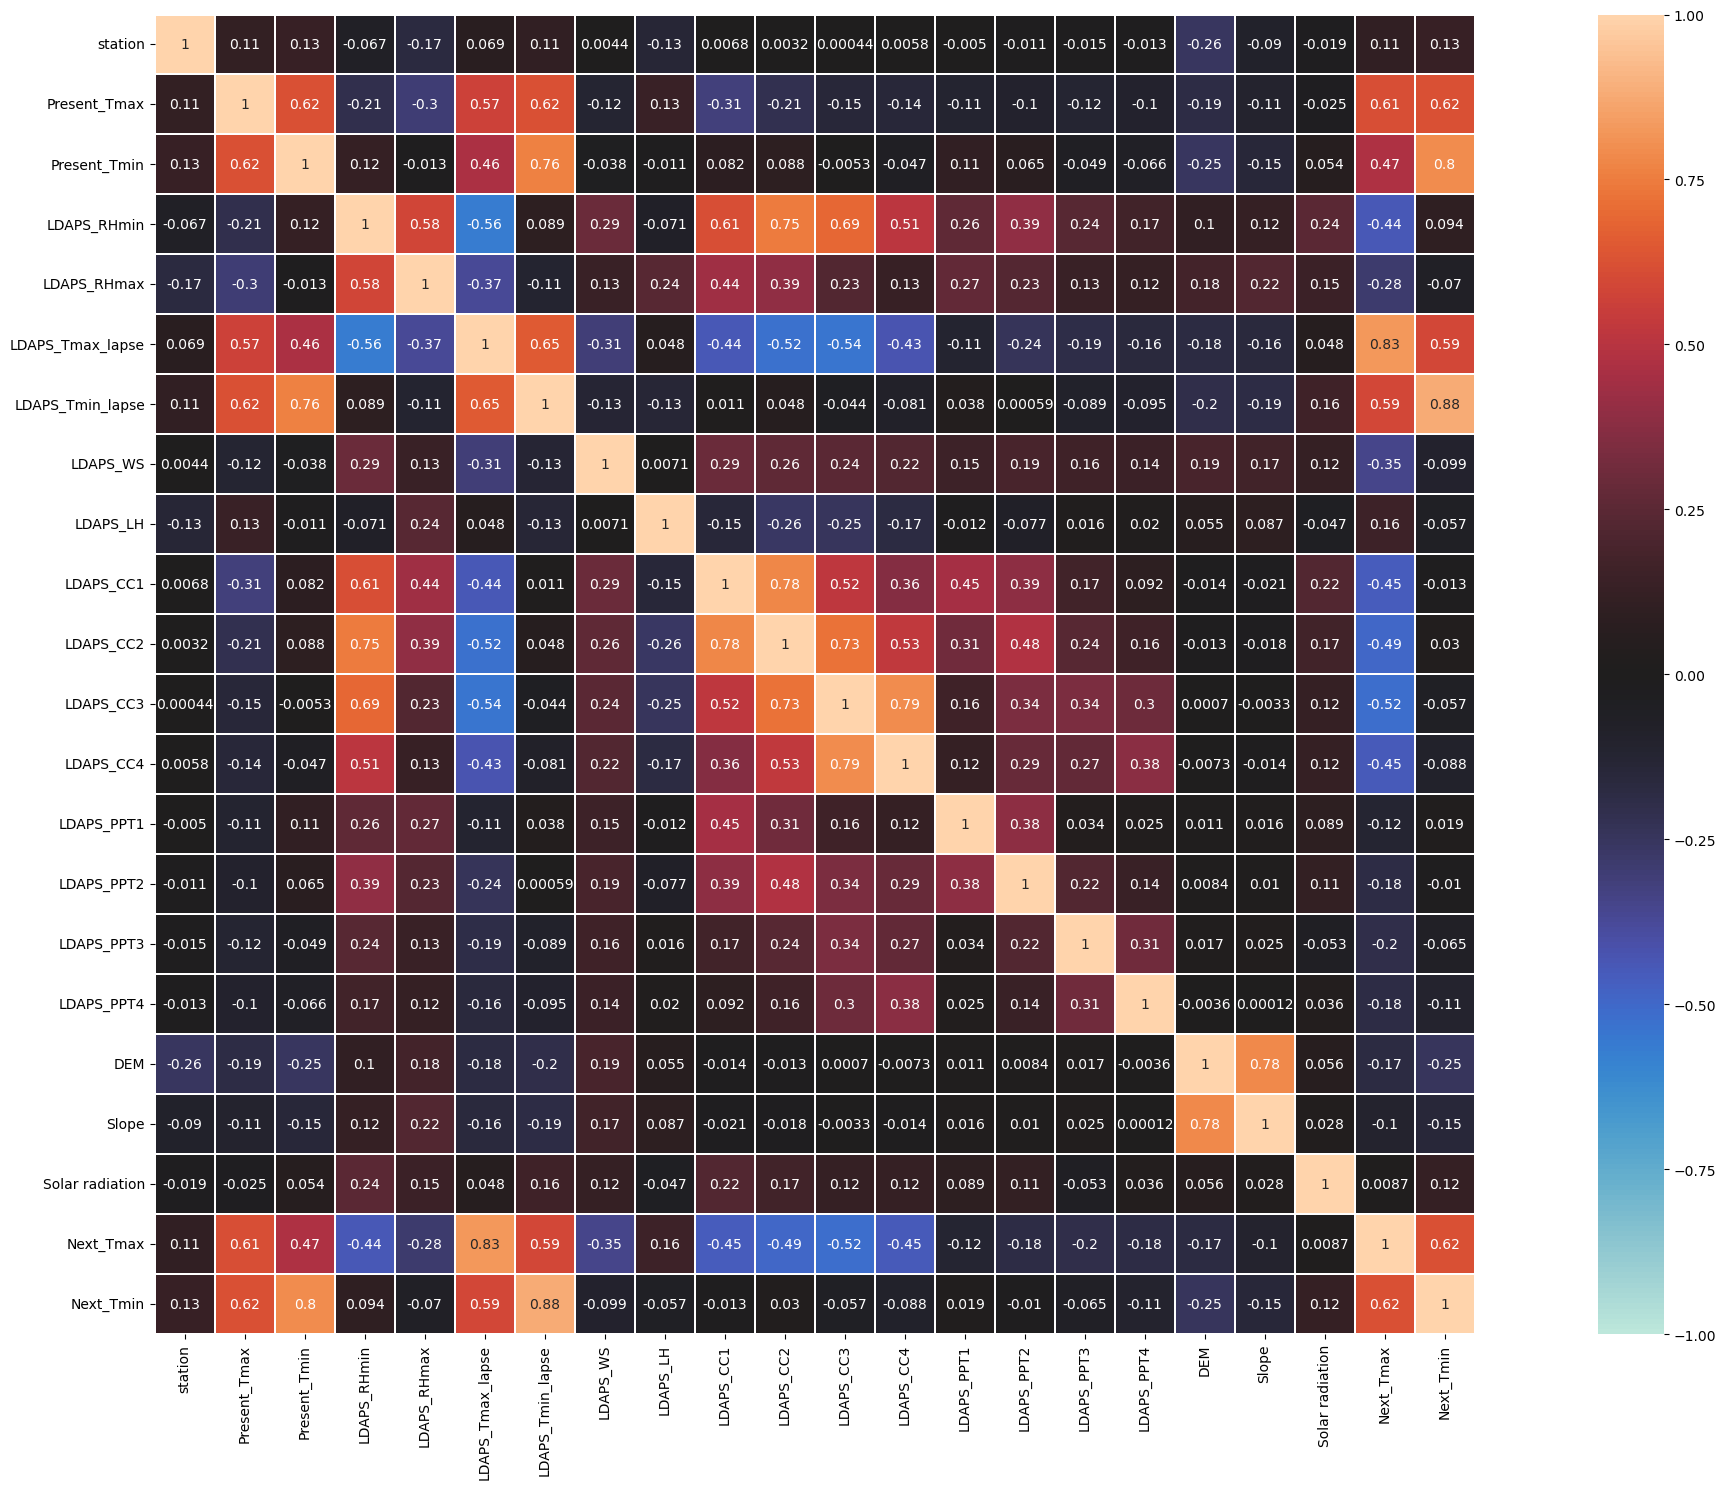

In [15]:
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr,vmin = -1,vmax = 1, annot = True, square = True, center = 0, fmt = '.2g', linewidths = 0.1)
plt.tight_layout()

In [16]:
df.skew()

C:\Users\ROOPSHREE\AppData\Local\Temp\ipykernel_55700\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


station             0.000182
Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

In [17]:
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','Slope']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df.reset_index(inplace = True)


In [18]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

df['Date'] = enc.fit_transform(df['Date'].values.reshape(-1,1))

In [19]:
x = df.drop(['Next_Tmax','Next_Tmin'], axis=1)
y = df[['Next_Tmax','Next_Tmin']]

In [20]:
for index in x.skew().index:
    if x.skew().loc[index] > 0.5:
        x[index] = np.cbrt(x[index])
        if x.skew().loc[index] <-0.5:
            x[index] = np.square(x[index])

In [21]:
x.skew()

index               0.000797
station             0.007782
Date                0.011636
Present_Tmax       -0.230063
Present_Tmin       -0.217252
LDAPS_RHmin         0.286785
LDAPS_RHmax        -0.755610
LDAPS_Tmax_lapse   -0.098432
LDAPS_Tmin_lapse   -0.384715
LDAPS_WS            0.574715
LDAPS_LH           -0.280014
LDAPS_CC1           0.487881
LDAPS_CC2           0.477352
LDAPS_CC3           0.195367
LDAPS_CC4          -0.450584
LDAPS_PPT1          1.990867
LDAPS_PPT2          2.322561
LDAPS_PPT3          2.643657
LDAPS_PPT4          2.959830
DEM                 0.942358
Slope               0.627590
Solar radiation    -0.503397
dtype: float64

In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(x)
X = pd.DataFrame(X, columns = x.columns)

In [23]:
from sklearn.linear_model import LinearRegression
max_r_score = 0
r_state = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state = r_state)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
        
print("max r2 score is",max_r_score,"on random State",r_state)   


max r2 score is 0.7888734726272904 on random State 1


In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 2)

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()
ext.fit(x_train,y_train)
y_pred = ext.predict(x_train)
pred_ext = ext.predict(x_test)

r2score = r2_score(y_test,pred_ext)*100

In [26]:
grid_params = {
    'max_depth':[8,9,10,12,15,20],
    'n_estimators': [500,700,1000,1200],
    'min_samples_split':[2,3]
}

In [ ]:
GCV = GridSearchCV(ExtraTreesRegressor(),grid_params, cv = 5)
GCV.fit(x_train,y_train)

In [ ]:
model_1 =ExtraTreesRegressor(max_depth = 20,n = n_estimators = 500, min_samples_split = 2)
model_1.fit(x_train,y_train)
y_pred =model_1.predict(x)
pred = model_1.predict(x_test)


In [ ]:
pred